In [3]:
import numpy as np
import pandas as pd
import yfinance

- Series
- DataFrame
- Index

In [6]:
tesla = yfinance.download('TSLA', start='2010-01-01', end='2021-01-08', progress=False)
tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2020-12-31,699.989990,718.719971,691.119995,705.669983,705.669983,49570900
2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200
2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200


## 1. DataFrame

### 1.1 Slicing

- loc[row_label, column_label]
- iloc[row_index, column_index]

In [12]:
tesla.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500


In [11]:
tesla.loc['2010-06-29', 'High':'Close']

High     5.000
Low      3.508
Close    4.778
Name: 2010-06-29 00:00:00, dtype: float64

In [13]:
tesla.iloc[0, 1:4]

High     5.000
Low      3.508
Close    4.778
Name: 2010-06-29 00:00:00, dtype: float64

In [17]:
tesla.iloc[0, 1:4].to_frame().T

,High,Low,Close
2010-06-29,5.0,3.508,4.778


In [18]:
tesla.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500


In [20]:
tesla.loc[['2010-07-01', '2010-07-07'] , ['Open', 'High']]

,Open,High
Date,,
2010-07-01,5.00,5.184
2010-07-07,3.28,3.326


In [19]:
tesla.iloc[[2, 5] , 0:2]

,Open,High
Date,,
2010-07-01,5.00,5.184
2010-07-07,3.28,3.326


- at[row_label, column_label]: Take only one value
- iat[row_index, column_index]:Take only one value

In [21]:
tesla.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500


In [25]:
tesla.at['2010-06-30', 'High']

6.084000110626221

In [26]:
tesla.iat[1, 1]

6.084000110626221

### 1.2. Masking

In [27]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [28]:
tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,699.989990,718.719971,691.119995,705.669983,705.669983,49570900
2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200
2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200
2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000
2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51164400


In [32]:
tesla[tesla.index >= '2018-01-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,62.400002,64.421997,62.200001,64.106003,64.106003,21761000
2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500
2018-01-04,62.574001,63.709999,61.136002,62.924000,62.924000,49731500
2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000
2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000
...,...,...,...,...,...,...
2020-12-31,699.989990,718.719971,691.119995,705.669983,705.669983,49570900
2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200
2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200


In [36]:
# tesla.Close
tesla[tesla['Close'] > 705]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,699.989990,718.719971,691.119995,705.669983,705.669983,49570900
2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200
2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200
2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000
2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51164400


In [47]:
tesla[(tesla['Close'] > 705) & (tesla.index > '2021-01-05')]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-06,758.489990,774.00000,749.099976,755.979980,755.979980,44700000
2021-01-07,777.630005,816.98999,775.200012,816.039978,816.039978,51164400


In [48]:
tesla.query("Close > 705")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,699.989990,718.719971,691.119995,705.669983,705.669983,49570900
2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200
2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200
2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000
2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51164400


In [52]:
tesla.query("Close > 705 and index > '2021-01-05'")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-06,758.489990,774.00000,749.099976,755.979980,755.979980,44700000
2021-01-07,777.630005,816.98999,775.200012,816.039978,816.039978,51164400


In [53]:
tesla.query("Close > 705 and Date > '2021-01-05'")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-06,758.489990,774.00000,749.099976,755.979980,755.979980,44700000
2021-01-07,777.630005,816.98999,775.200012,816.039978,816.039978,51164400


In [54]:
tesla.query("Close == Close.max()")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-07,777.630005,816.98999,775.200012,816.039978,816.039978,51164400


In [56]:
tesla[tesla.Close == tesla.Close.max()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-07,777.630005,816.98999,775.200012,816.039978,816.039978,51164400


In [57]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03
mean,61.787387,63.177766,60.379550,61.901182,61.901182,3.033507e+07
std,96.730979,99.420309,94.162898,97.309623,97.309623,2.830383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.449000,7.628000,7.366000,7.491000,7.491000,1.055545e+07
50%,44.504002,45.172001,43.810001,44.453999,44.453999,2.382200e+07
75%,60.694000,61.695000,59.710001,60.817999,60.817999,3.921050e+07
max,777.630005,816.989990,775.200012,816.039978,816.039978,3.046940e+08


Central tendency: Mean, median, mode

Statistic:
- Descriptive statistic: sum, min, max, median, mean, count, std, variance,...
- Inference statistic: hypothesis testing

In [59]:
tesla.Close.quantile(0.1)

5.510000228881836

In [63]:
np.array([1, 2, 3, 4, 9, 10, 7, 7, 8, 10, 1000]).mean()

96.45454545454545

In [64]:
np.median(np.array([1, 2, 3, 4, 9, 10, 7, 7, 8, 10, 1000]))

7.0

In [65]:
tesla.query('Close > Close.quantile(0.75)')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-10,61.830002,62.745998,61.742001,62.478001,62.478001,38322500
2017-04-11,62.675999,62.694000,61.099998,61.742001,61.742001,28623000
2017-04-19,60.492001,61.324001,60.422001,61.104000,61.104000,19490000
2017-04-21,60.400002,61.279999,60.084000,61.119999,61.119999,22549000
2017-04-24,61.844002,62.110001,61.203999,61.605999,61.605999,25417500
...,...,...,...,...,...,...
2020-12-31,699.989990,718.719971,691.119995,705.669983,705.669983,49570900
2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200
2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200


In [67]:
from seaborn import load_dataset

In [68]:
tips = load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [69]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [70]:
tips.day.nunique()

4

In [77]:
tips.to_excel('tips.xlsx', index=False)

In [79]:
pd.read_excel('tips.xlsx', engine='openpyxl')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [80]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

In [82]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [90]:
tips.groupby('time').agg({'total_bill': ['sum', 'mean'], 'tip': 'mean'})

total_bill                  tip
              sum       mean      mean
time                                  
Lunch     1167.47  17.168676  2.728088
Dinner    3660.30  20.797159  3.102670

In [95]:
tips.groupby('day').total_bill.sum().sort_values(ascending=False)

day
Sat     1778.40
Sun     1627.16
Thur    1096.33
Fri      325.88
Name: total_bill, dtype: float64

In [101]:
group = tips.groupby(['sex', 'time']).sum()
group

total_bill     tip  size
sex    time                            
Male   Lunch       595.60   95.11    78
       Dinner     2661.22  389.96   335
Female Lunch       571.87   90.40    86
       Dinner      999.08  156.11   128

In [103]:
group.reset_index()

,sex,time,total_bill,tip,size
0,Male,Lunch,595.60,95.11,78
1,Male,Dinner,2661.22,389.96,335
2,Female,Lunch,571.87,90.40,86
3,Female,Dinner,999.08,156.11,128


In [105]:
group.loc[('Male', 'Lunch'), 'total_bill']

595.5999999999999

In [102]:
group.index

MultiIndex([(  'Male',  'Lunch'),
            (  'Male', 'Dinner'),
            ('Female',  'Lunch'),
            ('Female', 'Dinner')],
           names=['sex', 'time'])

## 2. Series

In [97]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [98]:
series = tips.total_bill
series

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [99]:
series_stock = tesla.Close
series_stock

Date
2010-06-29      4.778000
2010-06-30      4.766000
2010-07-01      4.392000
2010-07-02      3.840000
2010-07-06      3.222000
                 ...    
2020-12-31    705.669983
2021-01-04    729.770020
2021-01-05    735.109985
2021-01-06    755.979980
2021-01-07    816.039978
Name: Close, Length: 2651, dtype: float64

In [100]:
type(series_stock)

pandas.core.series.Series

In [106]:
series_stock.values

array([  4.77799988,   4.76599979,   4.3920002 , ..., 735.10998535,
       755.97998047, 816.03997803])

In [107]:
series_stock.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07'],
              dtype='datetime64[ns]', name='Date', length=2651, freq=None)

- loc[row_label]
- iloc[row_index]

In [110]:
series_stock.head()

Date
2010-06-29    4.778
2010-06-30    4.766
2010-07-01    4.392
2010-07-02    3.840
2010-07-06    3.222
Name: Close, dtype: float64

In [112]:
series_stock.loc['2010-06-30': '2010-07-06']

Date
2010-06-30    4.766
2010-07-01    4.392
2010-07-02    3.840
2010-07-06    3.222
Name: Close, dtype: float64

In [114]:
series_stock.iloc[1:3]

Date
2010-06-30    4.766
2010-07-01    4.392
Name: Close, dtype: float64

### 2.2  Masking

In [117]:
series_stock[series_stock.index > '2020-07-12']

Date
2020-07-13    299.411987
2020-07-14    303.359985
2020-07-15    309.201996
2020-07-16    300.127991
2020-07-17    300.167999
                 ...    
2020-12-31    705.669983
2021-01-04    729.770020
2021-01-05    735.109985
2021-01-06    755.979980
2021-01-07    816.039978
Name: Close, Length: 125, dtype: float64

In [119]:
series_stock.sort_values(ascending=False)

Date
2021-01-07    816.039978
2021-01-06    755.979980
2021-01-05    735.109985
2021-01-04    729.770020
2020-12-31    705.669983
                 ...    
2010-07-08      3.492000
2010-07-09      3.480000
2010-07-12      3.410000
2010-07-06      3.222000
2010-07-07      3.160000
Name: Close, Length: 2651, dtype: float64

In [122]:
tips.shape

(244, 7)

In [123]:
tips.memory_usage()

Index          128
total_bill    1952
tip           1952
sex            340
smoker         340
day            436
time           340
size          1952
dtype: int64

In [124]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


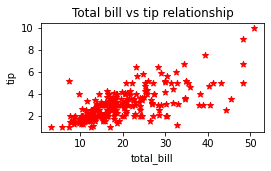

In [134]:
tips.plot(kind='scatter', x='total_bill', y='tip', c='r', s=40, 
          marker='*', title='Total bill vs tip relationship', figsize=(4, 2));

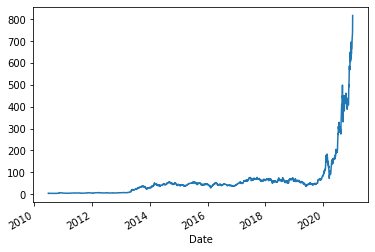

In [136]:
tesla.Close.plot();

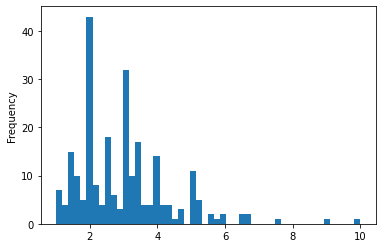

In [143]:
tips.tip.plot(kind='hist', bins=50);

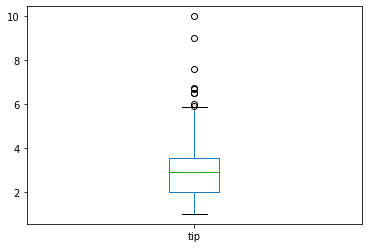

In [144]:
tips.tip.plot(kind='box');

In [145]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


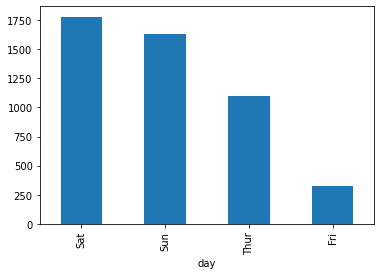

In [149]:
tips.groupby('day').total_bill.sum().sort_values(ascending=False).plot(kind='bar');